<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/ml06_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# CSV 파일 깃허브 주소
wine_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/wine.csv'

In [3]:
wine = pd.read_csv(wine_csv)

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
wine['class'].unique()

array([0., 1.])

In [9]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

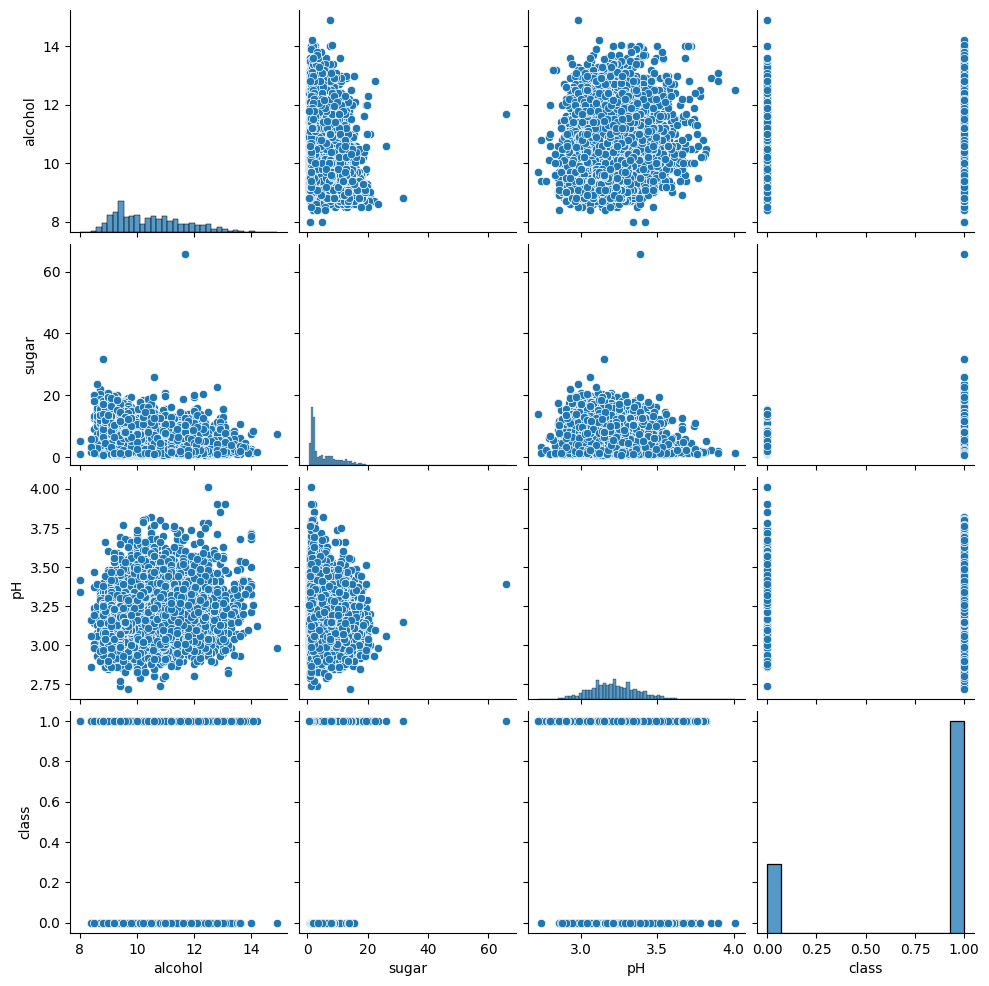

In [8]:
sns.pairplot(data=wine)
plt.show()

In [10]:
X = wine.iloc[:, :-1].values # 특성 (2차원) 배열
y = wine['class'].values # 타겟 (1차원) 배열

In [13]:
X.shape # 특성 배열의 shape = (n_sampels, n_features)

(6497, 3)

In [14]:
y.shape # 타겟 배열의 shape = (n_sampels,)

(6497,)

In [ ]:
feature_names = ['alcohol','sugar','ph'] # 특성 이름
target_names = ['red','white'] # 타겟 이름 ( 0: red, 1:white)

# 훈련, 검증, 테스트 셋 분리

In [15]:
X_tr_total, X_te, y_tr_total, y_te = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)



In [16]:
np.unique(y_tr_total, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [17]:
np.unique(y_te, return_counts=True)

(array([0., 1.]), array([320, 980]))

In [18]:
# 훈련셋을 다시 훈련셋과 검증셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_total, y_tr_total, test_size=0.2, random_state=42, stratify=y_tr_total)

In [20]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((4157, 3), (1040, 3), (4157,), (1040,))

# Decision Tree(의사결정 나무) 분류

In [21]:
tree_clf = DecisionTreeClassifier()

모델 훈련(데이터 학습)

In [22]:
tree_clf.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [24]:
y_tr_pred = tree_clf.predict(X_tr)

In [25]:
accuracy_score(y_tr, y_tr_pred)

0.9980755352417608

In [26]:
confusion_matrix(y_tr, y_tr_pred)

array([[1022,    1],
       [   7, 3127]])

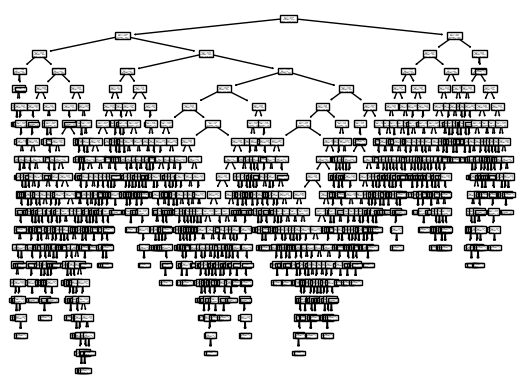

In [27]:
plot_tree(tree_clf)
plt.show()

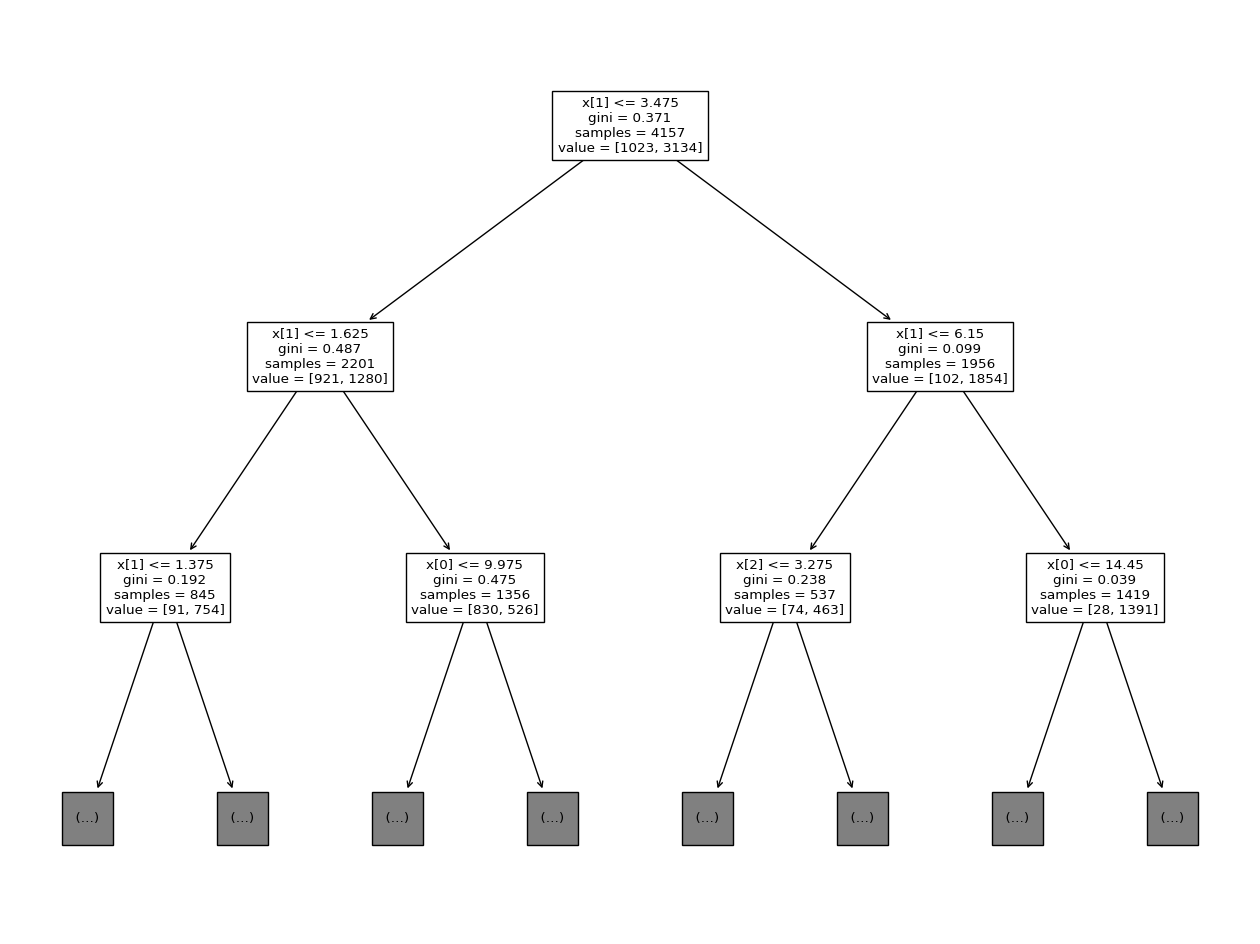

In [28]:

plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2,
          feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

In [29]:


y_val_pred = tree_clf.predict(X_val)

accuracy_score(y_val, y_val_pred)

confusion_matrix(y_val, y_val_pred)

array([[196,  60],
       [ 71, 713]])

## 하이퍼 파라미터 튜닝

In [30]:
trains = []
vals = []
klist = [x for x in range(1,21)]
for k in klist:

  tree_clf = DecisionTreeClassifier(max_depth=k)
  tree_clf.fit(X_tr, y_tr)
  y_tr_pred = tree_clf.predict(X_tr)
  trainel =  accuracy_score(y_tr, y_tr_pred)
  y_val_pred = tree_clf.predict(X_val)
  valel = accuracy_score(y_val, y_val_pred)
  trains.append(trainel)
  vals.append(valel)


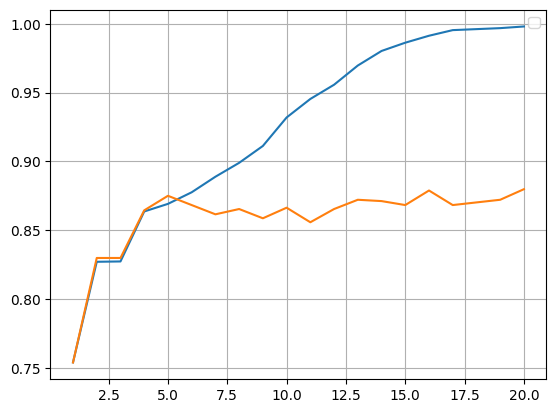

In [35]:
sns.lineplot(x=klist, y=trains)
sns.lineplot(x=klist, y=vals)
plt.grid()
plt.legend()

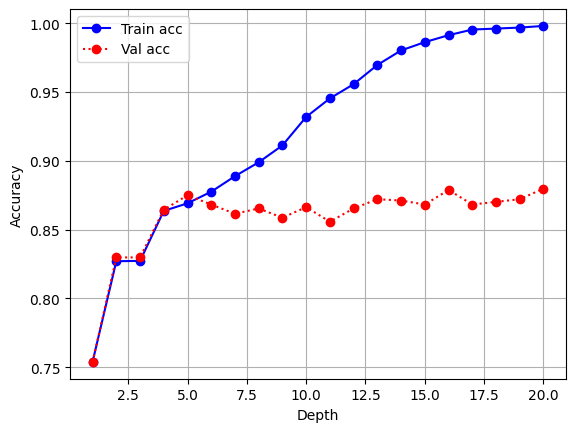

In [36]:
plt.plot(klist, trains, 'bo-', label = 'Train acc')
plt.plot(klist, vals, 'ro:',label='Val acc')
plt.grid()
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.show()

위 결과를 보면 의사결정 나무의 max_depth를 6보다 크게 하는 것은 검증 셋의 정확도를 높이지 못하고 과대적합(overfitting)만 더 커지는 결과를 줌.

## 교차 검증

In [42]:
# 전체 데이터를 훈련/테스트 셋으로 나누고, 훈련 셋(X_tr_total, y_tr_total)을 사용해서 교차 검증.
# 교차 검증에서 사용할 머신 러닝 모델 생성
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [46]:
cv = cross_validate(estimator=tree_clf, # 머신 러닝 모델
                    X=X_tr_total, y=y_tr_total, # X=특성 모델, y=타겟 배열
                    cv=5, n_jobs=-1, # cv : 교차 검증 fold 개수
                    return_train_score=True) # 훈련 셋 점수 리턴 여부

# 평가 점수(Score)
# (1) 분류 : 정확도(Accuracy)
# (2) 회귀 : 결정 계수(R2 Score)

In [47]:
# cv -> dict 타입, fit_time : 훈련 시간, score_time : 평가 시간, test_score : 검증 셋 점수(정확도), train_score : 훈련 셋의 점수(정확도)

# 검증 셋 점수들의 평균 -> 한 번도 학습되지 않은 test 셋의 점수와 비슷하거나 조금 더 높을 수 있음.
np.mean(cv['test_score'])

0.8620333900940252

In [48]:
tree_clf.fit(X_tr_total, y_tr_total) # 전체 훈련 셋을 학습
tree_clf.score(X_te, y_te) # 한 번도 학습되지 않은 테스트 셋에서 점수 계산

0.8484615384615385

# Grid Search 교차 검증

교차 검증을 사용한 HyperParameter Tuning 방법.


Decision Tree 알고리즘의 하이퍼파라미터 :

* max_depth : 나무의 최대 깊이
* max_leaf_node : leaf_node(종단 노드, terminal node)의 최대 개수.
* max_features : 각 노드에서 분할에 사용할 특성의 최대 개수.
* min_samples_split : 분할 되기 위해 노드가 가져야할 샘플의 최소 개수(또는 비율).
* min_samples_leaf : leaf node가 가지고 있어야 할 최소 샘플 개수(비율)

---

* `max_`로 시작하는 파라미터들은 값을 증가시키면 나무의 크기가 더 커짐. 과대 적합이 더 커짐. 작아지면 과대 적합 작아짐.
* `min_` 로 시작하는 파라미터들은 값을 증가시키면 나무의 크기가 작아지고, 과대적합이 줄어듦, 감소시키면 나무 크기가 커지고, 과대적합이 커짐.

In [50]:
tree_clf = DecisionTreeClassifier(random_state=42)

In [51]:
# Grid Search 교차 검증에서 사용할 파라미터 조합

params = {

          'max_depth' : np.arange(1,21),
          'min_samples_split' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

}

In [53]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=tree_clf, # 교차 검증 머신 러닝 모델
                       param_grid=params, # 교차 검증 하이퍼파라미터 조합
                       n_jobs=-1, # 병렬 작업 수
                       cv=5) # 교차 검증 FOLD

In [54]:
# Grid Search CV 수행

grid_cv.fit(X_tr_total, y_tr_total)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': [0.001, 0.005, 0.01, 0.05, 0.1,
                                               0.2]})

In [55]:
grid_cv.best_params_

{'max_depth': 11, 'min_samples_split': 0.01}

In [57]:
grid_cv.best_score_ # 5-fold 검증 셋들에서 정확도 평균
#> 한번도 훈련되지 않은 테스트 셋의 점수와 비슷하거나 약간 높음.

0.8666522914044569

In [59]:
# 최적의 파라미터 조합을 갖는 베스트 모델의 테스트 점수 :
best_model = grid_cv.best_estimator_
best_model.score(X_te, y_te)

0.8538461538461538